<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/LinLat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
n = 20
k = 40
j = 30
l_dim = 10

A_ = np.random.rand(k,n)
B_ = np.random.rand(j,n)

L_ = np.random.rand(l_dim,n)
L_inv = np.linalg.pinv(L_)

X_ = np.dot(A_,L_inv)
Y_ = np.dot(B_,L_inv)




6.355784379729822 4.818121498754592


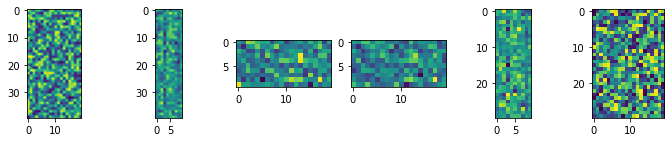

In [52]:

def als_round(A_,B_,X_,Y_,L_,to_plot=False):
    X_inv = np.linalg.pinv(X_)
    L_ax = np.dot(X_inv,A_)

    Y_inv = np.linalg.pinv(Y_)
    L_by = np.dot(Y_inv,B_)

    L_ax_inv = np.linalg.pinv(L_ax)
    Y_ab = np.dot(B_,L_ax_inv)

    L_by_inv = np.linalg.pinv(L_by)
    X_ba = np.dot(A_,L_by_inv)

    A_ab = np.dot(X_ba,L_ax)
    B_ba = np.dot(Y_ab,L_by)

    A_er = np.linalg.norm(A_-A_ab)
    B_er= np.linalg.norm(B_-B_ba)
    print(A_er,B_er)

    if to_plot:
        fig,ax = plt.subplots(1,6,figsize=(12,2))
        ax[0].imshow(A_)
        ax[1].imshow(X_ba)
        ax[2].imshow(L_ax)
        ax[3].imshow(L_by)
        ax[4].imshow(Y_ab)
        ax[5].imshow(B_)
    return X_ba, Y_ab



In [54]:
to_plot = False
for i_ in range(20):
    X_, Y_ = als_round(A_,B_,X_,Y_,L_,to_plot=to_plot)

86.16715040304699 49.650763148192055
60.54230151689954 107.2543045869133
123.97506216233215 70.97316402594952
84.19930492198705 158.70237600892523
180.5373587156181 102.92290773907094
119.0432564749527 236.808198059211
265.77147246836023 151.0871409116138
170.931348864665 355.8309284496764
395.0071729678909 224.04402143099824
248.89990758838118 537.7639455641419
591.9593075540135 334.9693873317223
366.87904844052923 816.5518133661568
893.3398149384583 504.1119889734802
546.3348451187352 1244.6154708725587
1356.0176549033329 762.6086561245172
820.346137970915 1902.9527282523502
2068.1395668084006 1158.3669858328165
1239.899255209902 2916.778009142242
3166.409167157459 1765.1391734142544
1883.6106901961227 4479.746150990745
